# Support Vector Classifier Implementation

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

In [2]:
from sklearn.datasets import make_classification

In [4]:
x,y = make_classification(n_samples = 1000,n_features = 2,n_classes = 2, n_clusters_per_class=2,n_redundant=0)

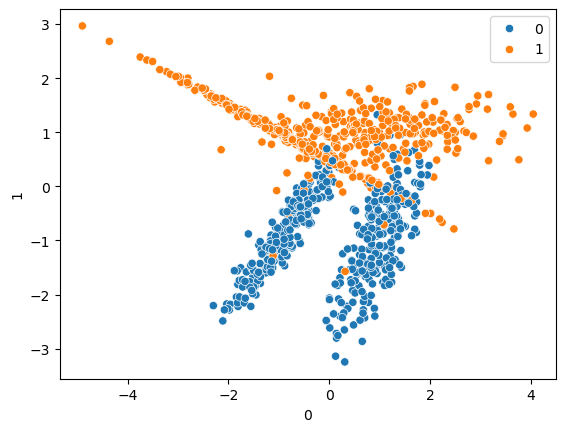

In [9]:
sns.scatterplot(x = pd.DataFrame(x)[0],y = pd.DataFrame(x)[1],hue = y)
plt.show()

In [10]:
# Spliting the dataset into train and test data
from sklearn.model_selection import train_test_split

In [11]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.33,random_state = 42)

In [12]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((670, 2), (330, 2), (670,), (330,))

In [15]:
# Model training
from sklearn.svm import SVC
svc = SVC(kernel = 'linear')

In [16]:
svc.fit(x_train,y_train)

SVC(kernel='linear')

In [17]:
y_pred = svc.predict(x_test)

In [18]:
# Checking Model Accuracy
from sklearn.metrics import accuracy_score, classification_report

In [19]:
print(accuracy_score(y_pred,y_test))
print(classification_report(y_pred,y_test))

0.9333333333333333
              precision    recall  f1-score   support

           0       0.94      0.92      0.93       158
           1       0.93      0.95      0.94       172

    accuracy                           0.93       330
   macro avg       0.93      0.93      0.93       330
weighted avg       0.93      0.93      0.93       330



In [20]:
# Hyperparameter tuning
from sklearn.model_selection import GridSearchCV

In [21]:
parameter = {"C":[0,1,10,100,1000],
            "gamma":[1,0.1,0.01,0.001,0.0001],
            "kernel":['linear','poly']}

In [24]:
clf = GridSearchCV(svc, param_grid=parameter,refit = True, verbose = 3)

In [27]:
clf.fit(x_train,y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV 1/5] END .........C=0, gamma=1, kernel=linear;, score=nan total time=   0.0s
[CV 2/5] END .........C=0, gamma=1, kernel=linear;, score=nan total time=   0.0s
[CV 3/5] END .........C=0, gamma=1, kernel=linear;, score=nan total time=   0.0s
[CV 4/5] END .........C=0, gamma=1, kernel=linear;, score=nan total time=   0.0s
[CV 5/5] END .........C=0, gamma=1, kernel=linear;, score=nan total time=   0.0s
[CV 1/5] END ...........C=0, gamma=1, kernel=poly;, score=nan total time=   0.0s
[CV 2/5] END ...........C=0, gamma=1, kernel=poly;, score=nan total time=   0.0s
[CV 3/5] END ...........C=0, gamma=1, kernel=poly;, score=nan total time=   0.0s
[CV 4/5] END ...........C=0, gamma=1, kernel=poly;, score=nan total time=   0.0s
[CV 5/5] END ...........C=0, gamma=1, kernel=poly;, score=nan total time=   0.0s
[CV 1/5] END .......C=0, gamma=0.1, kernel=linear;, score=nan total time=   0.0s
[CV 2/5] END .......C=0, gamma=0.1, kernel=line

GridSearchCV(estimator=SVC(kernel='linear'),
             param_grid={'C': [0, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['linear', 'poly']},
             verbose=3)

In [28]:
clf.best_params_

{'C': 1, 'gamma': 1, 'kernel': 'linear'}

In [30]:
y_pred = clf.predict(x_test)

In [31]:
# Accuracy Checking
from sklearn.metrics import accuracy_score,classification_report

In [32]:
print(accuracy_score(y_pred,y_test))

0.9333333333333333


In [33]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.94      0.92      0.93       158
           1       0.93      0.95      0.94       172

    accuracy                           0.93       330
   macro avg       0.93      0.93      0.93       330
weighted avg       0.93      0.93      0.93       330

